Projet: Analyse Exploratoire des Données

(Exploratory Data Analysis)




Les membres du groupes :HAILALA YASSMIN -EL OUAHI  NAJAT

In [ ]:
#importer les packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#ouvrire la bases de donnees
df=pd.read_csv('/content/drive/MyDrive/amazon.csv')

In [ ]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...
...,...,...,...,...,...,...,...,...,...,...,...,...
9663,s9664,Movie,Pride Of The Bowery,Joseph H. Lewis,"Leo Gorcey, Bobby Jordan",NaN,NaN,1940,7+,60 min,Comedy,New York City street principles get an East Si...
9664,s9665,TV Show,Planet Patrol,NaN,"DICK VOSBURGH, RONNIE STEVENS, LIBBY MORRIS, M...",NaN,NaN,2018,13+,4 Seasons,TV Shows,"This is Earth, 2100AD - and these are the adve..."
9665,s9666,Movie,Outpost,Steve Barker,"Ray Stevenson, Julian Wadham, Richard Brake, M...",NaN,NaN,2008,R,90 min,Action,"In war-torn Eastern Europe, a world-weary grou..."
9666,s9667,TV Show,Maradona: Blessed Dream,NaN,"Esteban Recagno, Ezequiel Stremiz, Luciano Vit...",NaN,NaN,2021,TV-MA,1 Season,"Drama, Sports","The series tells the story of Diego Maradona, ..."


On'a utilise la commande df.shape pour  retourner la dimension du DataFrame sous forme d'un tuple

In [ ]:
df.shape

(9668, 12)

La commande `df.duplicated().sum()`  va nous retourner  le nombre total de lignes dupliquées dans notre  DataFrame.

In [ ]:
df.duplicated().sum()

0

On'a utuliser La commande `df.isnull().sum()` pour retourner le nombre de valeurs nulles (ou manquantes) pour chaque colonne dans un DataFrame.

In [ ]:
#les valeurs manquantes
df.isnull().sum()

show_id            0
type               0
title              0
director        2083
cast            1233
country         8996
date_added      9513
release_year       0
rating           337
duration           0
listed_in          0
description        0
dtype: int64

La commande `df.columns` ,c'est pour qu'on puisse afficher la listes des colones

In [ ]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

1-Reponse à la première Question:Top 5 des meilleures catégories:
explication du code:
-Ce code divise les catégories combinées dans la colonne `listed_in` en plusieurs lignes, puis utilise `explode()` pour créer une ligne par catégorie. Ensuite, il compte les occurrences de chaque catégorie et affiche les cinq plus fréquentes.

In [ ]:
#Top 5 des meilleures catégories
# Séparer les catégories combinées en plusieurs lignes
df['listed_in'] = df['listed_in'].str.split(', ')

# Appliquer explode() pour séparer les catégories en plusieurs lignes
df_exploded = df.explode('listed_in')

# Compter le nombre d'occurrences de chaque catégorie individuelle
top_categories = df_exploded['listed_in'].value_counts().head(5)

# Afficher le top 5 des meilleures catégories
print("Top 5 des meilleures catégories :")
print(top_categories)

Top 5 des meilleures catégories :
listed_in
Drama       3687
Comedy      2099
Action      1657
Suspense    1501
Kids        1085
Name: count, dtype: int64


2-Reponse à la deuxième Question:Top des 5 réalisateurs:
-explication du code:
Ce code commence par compter combien de fois chaque réalisateur apparaît dans la colonne `director` d'un DataFrame `df` en utilisant `value_counts()`. Ensuite, il sélectionne les cinq réalisateurs les plus fréquents avec `head(5)`. Enfin, il imprime les noms de ces réalisateurs et leurs nombres d'occurrences.

In [ ]:
#Top 5 des réalisateurs
# Compter le nombre d'occurrences de chaque réalisateur
top_directors = df['director'].value_counts().head(5)

# Afficher le top 5 des réalisateurs
print("Top 5 des réalisateurs :")
print(top_directors)


Top 5 des réalisateurs :
director
Mark Knight              113
Cannis Holder             61
Moonbug Entertainment     37
Jay Chapman               34
Arthur van Merwijk        30
Name: count, dtype: int64


3-Reponse à la Troisième Question:Les dix meilleurs acteurs :
-explication du code:
 ce code  commence par supprimer les lignes avec des valeurs manquantes dans la colonne cast et filtre les lignes pour ne garder que celles avec des noms d'acteurs valides. Ensuite, il sépare les noms d'acteurs combinés en plusieurs lignes et utilise explode() pour que chaque acteur ait sa propre ligne. Il compte les occurrences de chaque acteur, sélectionne les dix plus fréquents et renomme les colonnes pour être plus descriptives. Enfin, il affiche les dix acteurs les plus fréquents et le nombre de films dans lesquels ils apparaissent.

In [ ]:
#Les dix meilleurs acteurs :
# Supprimer les lignes avec des valeurs manquantes dans la colonne 'cast'
df_cleaned_actors = df[df['cast'].notna()]

# Filtrer les lignes avec des noms d'acteurs valides (au moins 2 caractères)
df_cleaned_actors = df_cleaned_actors[df_cleaned_actors['cast'].str.len() > 1]

# Séparer les noms d'acteurs combinés en plusieurs lignes
df_cleaned_actors['cast'] = df_cleaned_actors['cast'].str.split(', ')

# Appliquer explode() pour séparer les noms d'acteurs en plusieurs lignes
df_exploded_actors = df_cleaned_actors.explode('cast')

# Compter le nombre d'occurrences de chaque acteur
top_actors = df_exploded_actors['cast'].value_counts().head(10).reset_index()

# Renommer les colonnes
top_actors.columns = ['Acteur', 'Nombre de Films']

# Afficher les dix meilleurs acteurs
print("Les dix meilleurs acteurs :")
print(top_actors)




Les dix meilleurs acteurs :
               Acteur  Nombre de Films
0      Maggie Binkley               56
1          Gene Autry               32
2              Nassar               30
3            Champion               29
4  Anne-Marie Newland               25
5         Prakash Raj               24
6          John Wayne               23
7          Roy Rogers               23
8  Cassandra Peterson               22
9         Danny Trejo               22


<ipython-input-30-71007171390e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned_actors['cast'] = df_cleaned_actors['cast'].str.split(', ')


4-Reponse à la quatrième Question:Les cinq meilleures séries télévisées avec le plus grand nombre de saisons
-explication du code:Ce code identifie les cinq séries télévisées avec le plus grand nombre de saisons dans  df. Il commence par extraire le nombre de saisons de la colonne duration et convertit ces valeurs en entiers. Ensuite, il filtre les entrées pour ne garder que celles de type 'TV Show'. Il trie ces séries en fonction du nombre de saisons en ordre décroissant et sélectionne les cinq premières. Enfin, il affiche les titres de ces séries ainsi que le nombre de saisons.

In [ ]:
#Les cinq meilleures séries télévisées avec le plus grand nombre de saisons
# Extraire le nombre de saisons de la colonne 'duration'
df['duration'] = df['duration'].str.extract('(\d+)', expand=False).astype(int)

# Filtrer les entrées de type 'TV Show'
tv_shows = df[df['type'] == 'TV Show']

# Trier les séries en fonction du nombre de saisons
top_tv_shows = tv_shows.sort_values(by='duration', ascending=False).head(5)

# Afficher les cinq meilleures séries télévisées avec le plus grand nombre de saisons
print("Les cinq meilleures séries télévisées avec le plus grand nombre de saisons :")
print(top_tv_shows[['title', 'duration']])



Les cinq meilleures séries télévisées avec le plus grand nombre de saisons :
                         title  duration
770           The Amazing Race        29
1007            Silent Witness        21
840                   Survivor        19
8071             Top Gear (UK)        15
3291  America's Next Top Model        14


5-Reponse à la cinquième Question:Identifier des contenus similaires en faisant correspondre des caractéristiques textuelles
-explication du code: convertit la colonne duration en chaînes de caractères, extrait le nombre de saisons avec une expression régulière, et convertit cette colonne en type entier. Ensuite, il filtre les entrées de type 'TV Show', trie ces séries par nombre de saisons en ordre décroissant, et sélectionne les cinq premières. Enfin, il affiche les titres de ces séries ainsi que leur nombre de saisons.

In [ ]:
#Identifier des contenus similaires en faisant correspondre des caractéristiques textuelles
#Convertir les données de la colonne 'duration' en chaînes de caractères
df['duration'] = df['duration'].astype(str)

# Utiliser une expression régulière pour extraire le nombre de saisons
df['duration'] = df['duration'].str.extract(r'(\d+)', expand=False)

# Convertir la colonne 'duration' en type entier
df['duration'] = df['duration'].astype(float)

# Filtrer les entrées de type 'TV Show'
tv_shows = df[df['type'] == 'TV Show']

# Trier les séries en fonction du nombre de saisons
top_tv_shows = tv_shows.sort_values(by='duration', ascending=False).head(5)

# Afficher les cinq meilleures séries télévisées avec le plus grand nombre de saisons
print("Les cinq meilleures séries télévisées avec le plus grand nombre de saisons :")
print(top_tv_shows[['title', 'duration']])




Les cinq meilleures séries télévisées avec le plus grand nombre de saisons :
                         title  duration
770           The Amazing Race      29.0
1007            Silent Witness      21.0
840                   Survivor      19.0
8071             Top Gear (UK)      15.0
3291  America's Next Top Model      14.0


On'a ajouter cette question : Top 5 des pays avec le plus grand nombre de contenus disponibles
-explication du code:Ce code identifie les cinq pays avec le plus grand nombre de contenus disponibles dans un DataFrame `df`. Il commence par compter le nombre d'occurrences de chaque pays dans la colonne `country` à l'aide de `value_counts()`. Ensuite, il sélectionne les cinq pays ayant le plus grand nombre de contenus disponibles en utilisant `head(5)`. Enfin, il affiche ces cinq pays ainsi que le nombre de contenus associés à chacun d'eux.


In [ ]:
# Top 5 des pays avec le plus grand nombre de contenus disponibles
top_countries = df['country'].value_counts().head(5)

# Afficher les cinq pays avec le plus grand nombre de contenus disponibles
print("Top 5 des pays avec le plus grand nombre de contenus disponibles :")
print(top_countries)



Top 5 des pays avec le plus grand nombre de contenus disponibles :
country
United States                    253
India                            229
United Kingdom                    28
Canada                            16
United Kingdom, United States     12
Name: count, dtype: int64


6-Reponse à la sixième question:Amazon se concentre-t-il davantage sur les séries télévisées que sur les films ces dernières années ?
-explication du code:Ce code analyse la répartition des films et séries télévisées sur Amazon Prime Video aux États-Unis. Il commence par filtrer les contenus produits aux États-Unis, puis compte le nombre total de films et de séries télévisées en utilisant la colonne `type`. Ensuite, il crée un graphique à secteurs pour visualiser cette répartition, avec les segments représentant les pourcentages de films et de séries télévisées. Cela permet de voir si Amazon Prime Video se concentre davantage sur les séries télévisées ou les films ces dernières années.

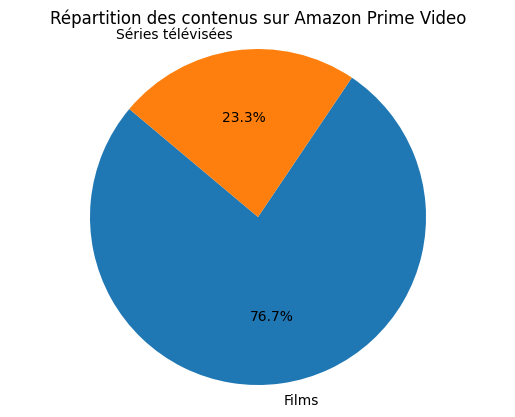

In [ ]:
#Amazon se concentre-t-il davantage sur les séries télévisées que sur les films ces dernières années ?
#Filtrer les données pour n'inclure que les contenus d'Amazon Prime Video
amazon_df = df[df['country'] == 'United States']  # Assumant qu'Amazon Prime Video est principalement aux États-Unis

# Compter le nombre total de films et de séries télévisées
total_movies = (amazon_df['type'] == 'Movie').sum()
total_tv_shows = (amazon_df['type'] == 'TV Show').sum()

# Créer un graphique à secteurs (camembert)
labels = ['Films', 'Séries télévisées']
sizes = [total_movies, total_tv_shows]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Répartition des contenus sur Amazon Prime Video')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Ici on 'a ajouter quelque  question:

La question : Quelle est la répartition des pays de production des contenus sur Amazon Prime Video ?
-Explication du code:Ce code analyse la répartition des pays de production des contenus sur Amazon Prime Video. Il compte le nombre de contenus produits par chaque pays en utilisant `value_counts()` et sélectionne les dix premiers. Ensuite, il crée un graphique à barres horizontales avec `plot(kind='barh', figsize=(10, 6))`, définissant la taille du graphique. Il ajoute un titre avec `plt.title('Top 10 des pays de production des contenus sur Amazon Prime Video')`, étiquette l'axe des x avec `plt.xlabel('Nombre de contenus')` et l'axe des y avec `plt.ylabel('Pays de production')`. Pour afficher le pays avec le plus de contenus en haut, il inverse l'ordre des pays avec `plt.gca().invert_yaxis()`. Enfin, il affiche le graphique avec `plt.show()`.

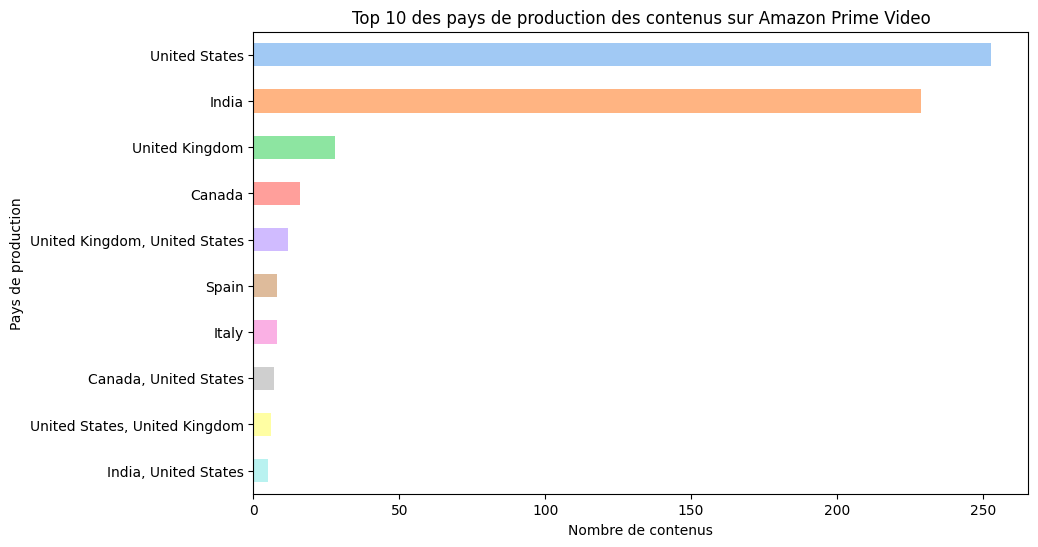

In [ ]:
 #Quelle est la répartition des pays de production des contenus sur Amazon Prime Video ?
# Compter le nombre de contenus pour chaque pays de production
top_countries = df['country'].value_counts().head(10)

# Créer une palette de couleurs pastel
colors = sns.color_palette("pastel", len(top_countries))

# Créer un graphique à barres horizontales avec des couleurs pastel
top_countries.plot(kind='barh', figsize=(10, 6), color=colors)
plt.title('Top 10 des pays de production des contenus sur Amazon Prime Video')
plt.xlabel('Nombre de contenus')
plt.ylabel('Pays de production')
plt.gca().invert_yaxis()  # Inverser l'ordre des pays pour afficher le plus grand en haut
plt.show()


La question:Quelle est la distribution des évaluations (ratings) des contenus sur Amazon Prime Video
-explication du code :Ce code analyse la distribution des évaluations des contenus sur Amazon Prime Video. Il commence par créer une copie du DataFrame  pour éviter de modifier les données originales. Ensuite, il convertit la colonne `rating` en type numérique, remplaçant les valeurs non convertibles par NaN. Les valeurs manquantes sont remplacées par la moyenne des évaluations existantes. Un histogramme est créé pour afficher la distribution des évaluations, avec 10 bacs et des bordures noires pour chaque barre. Le graphique est intitulé "Distribution des évaluations des contenus sur Amazon Prime Video" et les axes sont étiquetés avec "Évaluation" et "Nombre de contenus". Une grille est ajoutée pour améliorer la lisibilité, et le graphique est affiché.

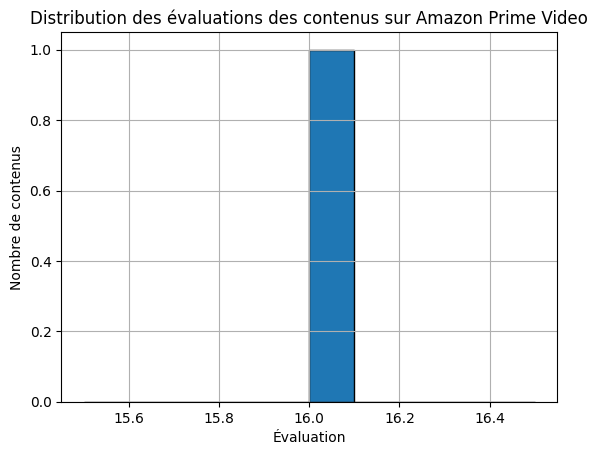

In [ ]:
#Quelle est la distribution des évaluations (ratings) des contenus sur Amazon Prime Video
df_copy = df.copy()

# Convertir la colonne 'rating' en type numérique
df_copy['rating'] = pd.to_numeric(df_copy['rating'], errors='coerce')

# Remplacer les valeurs manquantes par la moyenne des évaluations non manquantes
mean_rating = df_copy['rating'].mean()
df_copy['rating'].fillna(mean_rating, inplace=True)

# Afficher l'histogramme des évaluations
plt.hist(df_copy['rating'], bins=10, edgecolor='black')
plt.title('Distribution des évaluations des contenus sur Amazon Prime Video')
plt.xlabel('Évaluation')
plt.ylabel('Nombre de contenus')
plt.grid(True)
plt.show()


la  Question :Top des trois acteurs les plus profilique sur Amazon
-explication du code :Ce code identifie et visualise les trois acteurs les plus prolifiques sur Amazon Prime Video. Il commence par extraire et compter les occurrences des noms d'acteurs dans la colonne cast du DataFrame df, identifiant les dix acteurs les plus populaires. Ensuite, il filtre ces noms pour ne garder que ceux valides, c'est-à-dire ceux comportant plus d'un mot. Pour chaque acteur valide, il compte le nombre de titres dans lesquels ils ont joué. Les acteurs sont ensuite triés par ce nombre de titres. Les trois acteurs les plus prolifiques et le nombre de titres correspondants sont extraits pour créer un graphique à barres avec des couleurs différentes pour chaque barre. Le graphique affiche les trois acteurs avec le plus grand nombre de titres, avec des étiquettes et un titre descriptif.

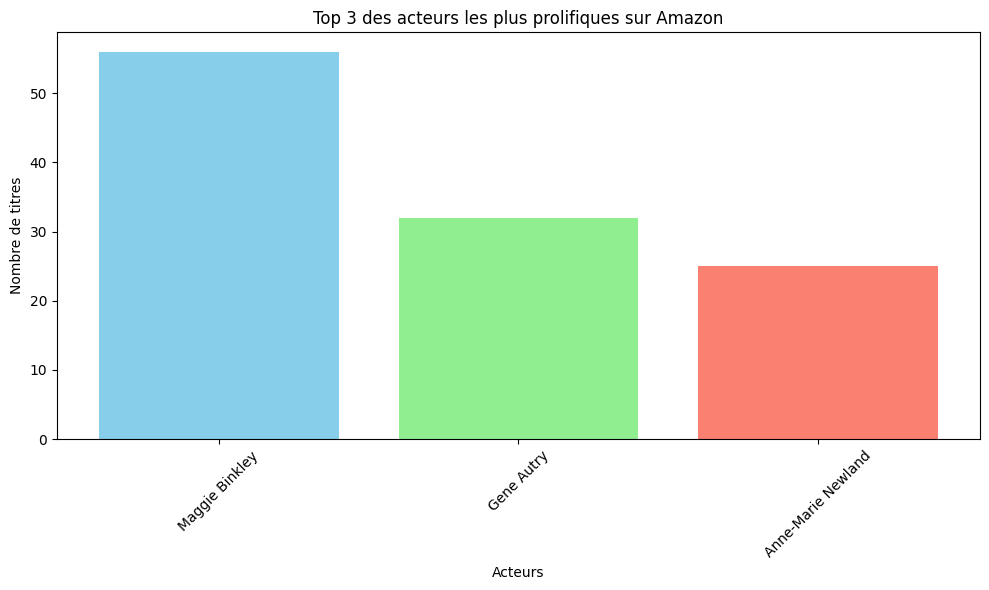

In [ ]:
# Top des trois acteurs les plus profilique sur Amazon
# Identifier les dix acteurs les plus populaires
top_actors = df['cast'].str.split(', ', expand=True).stack().value_counts().head(10).index.tolist()

# Filtrer les noms valides parmi les dix acteurs les plus populaires
valid_actors = [actor for actor in top_actors if len(actor.split()) > 1]

# Compter le nombre de titres dans lesquels chaque acteur a joué sur Amazon
actor_title_count = {actor: df[df['cast'].str.contains(actor, na=False)].shape[0] for actor in valid_actors}

# Trier les acteurs par le nombre de titres dans lesquels ils ont joué
sorted_actors = sorted(actor_title_count.items(), key=lambda x: x[1], reverse=True)

# Extraire les données pour le graphique
actors = [actor[0] for actor in sorted_actors[:3]]
titles_count = [actor[1] for actor in sorted_actors[:3]]

# Créer le diagramme à barres avec des couleurs différentes
colors = ['skyblue', 'lightgreen', 'salmon']

plt.figure(figsize=(10, 6))
plt.bar(actors, titles_count, color=colors)
plt.xlabel('Acteurs')
plt.ylabel('Nombre de titres')
plt.title('Top 3 des acteurs les plus prolifiques sur Amazon')
plt.xticks(rotation=45)
plt.tight_layout()

# Afficher le diagramme
plt.show()

La question:Identification des acteurs les plus couramment associés aux genres de films d'horreur sur Amazon Prime Video, et  le pourcentage de films d'horreur dans lesquels ils ont joué par rapport au nombre total de films qu'ils ont réalisés sur la plateforme
-explication du code :
Ce code identifie les acteurs les plus couramment associés aux films d'horreur sur Amazon Prime Video et calcule le pourcentage de films d'horreur dans lesquels ils ont joué par rapport à leur nombre total de films sur la plateforme. Il commence par filtrer les films d'horreur à partir du DataFrame `df`. Ensuite, il extrait et compte les occurrences des noms d'acteurs dans ces films pour identifier les dix acteurs les plus courants. Pour chaque acteur, il calcule le nombre total de films et le nombre de films d'horreur en utilisant la méthode `str.contains`. Le pourcentage de films d'horreur est ensuite calculé pour chaque acteur. Les données sont stockées dans un DataFrame, qui est trié par pourcentage de films d'horreur. Enfin, un diagramme à barres coloré est créé pour visualiser ces pourcentages, avec des étiquettes pour les acteurs et les pourcentages de films d'horreur, et le graphique est affiché.

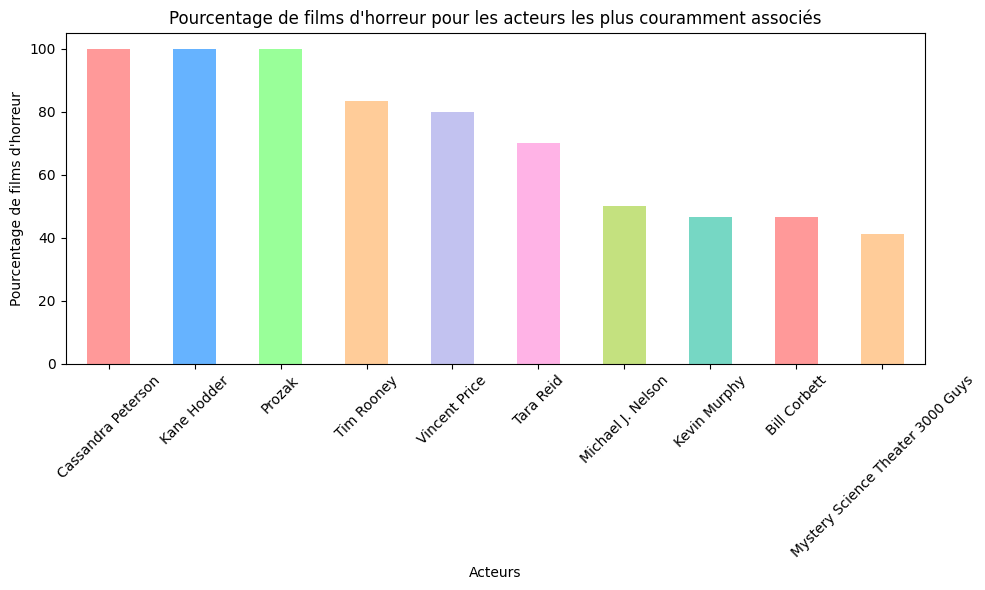

In [ ]:
#Identification des acteurs les plus couramment associés aux genres de films d'horreur sur Amazon Prime Video, et  le pourcentage de films d'horreur dans lesquels ils ont joué par rapport au nombre total de films qu'ils ont réalisés sur la plateforme
# Filtrer les films d'horreur
horror_movies = df[df['listed_in'].str.contains('Horror', case=False, na=False)]

# Identifier les acteurs les plus couramment associés aux films d'horreur
horror_actors = horror_movies['cast'].str.split(', ', expand=True).stack().value_counts().head(10).index.tolist()

# Créer un dictionnaire pour stocker le nombre total de films et le nombre de films d'horreur pour chaque acteur
actor_counts = {}
for actor in horror_actors:
    total_movies = df[df['cast'].str.contains(actor, case=False, na=False)].shape[0]
    horror_movies_count = horror_movies[horror_movies['cast'].str.contains(actor, case=False, na=False)].shape[0]
    actor_counts[actor] = {'total_movies': total_movies, 'horror_movies': horror_movies_count}

# Calculer le pourcentage de films d'horreur pour chaque acteur
for actor, counts in actor_counts.items():
    if counts['total_movies'] > 0:
        counts['percentage_horror'] = (counts['horror_movies'] / counts['total_movies']) * 100
    else:
        counts['percentage_horror'] = 0

# Créer un DataFrame pour stocker les données
actor_df = pd.DataFrame(actor_counts).T

# Trier le DataFrame par pourcentage de films d'horreur
actor_df = actor_df.sort_values(by='percentage_horror', ascending=False)

# Créer le diagramme à barres avec des couleurs différentes
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0','#ffb3e6',
          '#c4e17f','#76D7C4','#ff9999','#ffcc99']

plt.figure(figsize=(10, 6))
actor_df['percentage_horror'].plot(kind='bar', color=colors[:len(actor_df)])
plt.title('Pourcentage de films d\'horreur pour les acteurs les plus couramment associés')
plt.xlabel('Acteurs')
plt.ylabel('Pourcentage de films d\'horreur')
plt.xticks(rotation=45)
plt.tight_layout()

# Afficher le diagramme
plt.show()

La question:Visualisation de la fréquence des apparitions des différents acteurs dans les films et les émissions de télévision.
-explication du code:Il commence par séparer les noms des acteurs de la colonne cast en une seule liste et exclut les valeurs vides. Ensuite, il filtre les valeurs pour ne garder que les noms valides en utilisant str.replace et str.isalpha. Il compte la fréquence des apparitions de chaque acteur en utilisant value_counts et sélectionne les dix acteurs les plus fréquents pour une meilleure visualisation. Un diagramme à barres est créé avec des couleurs différentes pour chaque barre. Le graphique est intitulé "Fréquence des apparitions des acteurs dans les films et les séries télévisées", avec des étiquettes pour les acteurs et la fréquence d'apparition. Enfin, le graphique est affiché, montrant les acteurs les plus fréquents sur la plateforme.


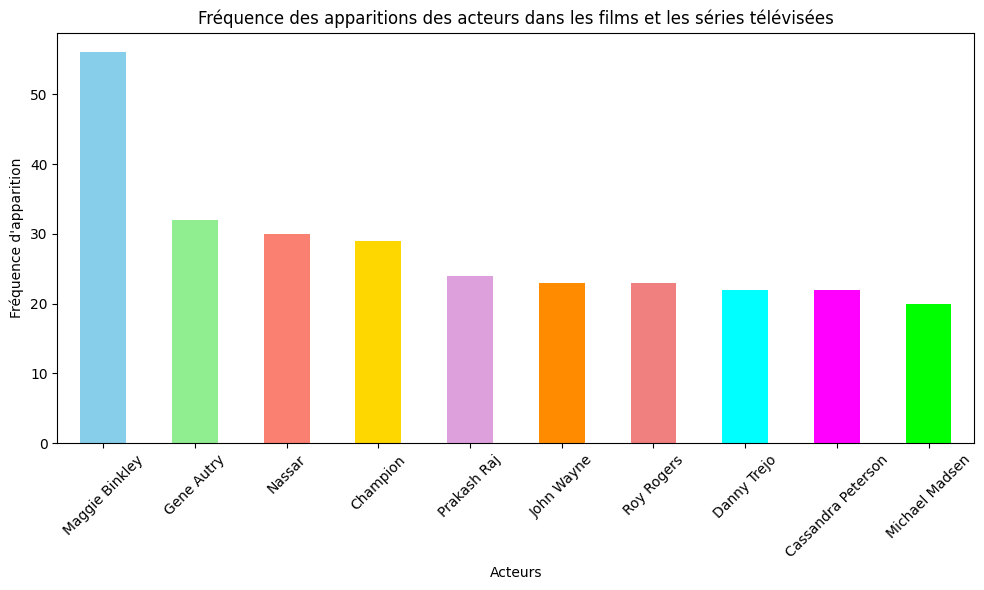

In [ ]:
#Visualisez la fréquence des apparitions des différents acteurs dans les films et les émissions de télévision.
# Séparer les noms des acteurs dans une seule liste et exclure les valeurs vides
all_actors = df['cast'].str.split(', ').explode().dropna()

# Filtrer les valeurs qui ne sont pas des noms d'acteurs (cette étape peut dépendre des spécificités de votre dataset)
valid_actors = all_actors[all_actors.str.replace(' ', '').str.isalpha()]

# Compter la fréquence des apparitions de chaque acteur
actor_counts = valid_actors.value_counts()

# Prendre les 10 acteurs les plus fréquents pour une meilleure visualisation
top_actors = actor_counts.head(10)

# Créer le diagramme à barres avec des couleurs différentes
colors = ['skyblue', 'lightgreen', 'salmon', 'gold', 'plum', 'darkorange', 'lightcoral', 'cyan', 'magenta', 'lime']

plt.figure(figsize=(10, 6))
top_actors.plot(kind='bar', color=colors)
plt.title('Fréquence des apparitions des acteurs dans les films et les séries télévisées')
plt.xlabel('Acteurs')
plt.ylabel('Fréquence d\'apparition')
plt.xticks(rotation=45)
plt.tight_layout()

# Afficher le diagramme
plt.show()

La question:Visualisation de la distribution des contenus par groupes d'âge et types (films/séries)
-explication du code :Ce code visualise la distribution des contenus sur Amazon Prime Video par groupes d'âge et types (films/séries). Il commence par définir des classifications par âge en quatre groupes : petits enfants (`little_kids`), enfants plus âgés (`older_kids`), adolescents (`teens`) et adultes (`mature`). Notre dataset `amazone` est chargé à partir d'un fichier CSV, puis filtré pour exclure les valeurs manquantes dans la colonne `rating`, créant `amazone_filtered`. Les contenus sont classés en groupes d'âge (`age_group`) et une nouvelle colonne `age_group` est ajoutée à `amazone_filtered`. Les données sont regroupées par groupe d'âge et type de contenu, et les résultats sont empilés dans une table `amazone_grouped`. Un diagramme en camembert est créé pour chaque type de contenu (film et série), avec une figure `fig` et plusieurs axes `axes`.  Un titre global est ajouté avec `plt.suptitle`, et le graphique est ajusté et affiché avec `plt.tight_layout()` et `plt.show()`, permettant de visualiser la répartition des contenus pour différents groupes d'âge et types.


<ipython-input-17-5a5f4146b01a>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amazone_filtered['age_group'] = age_group


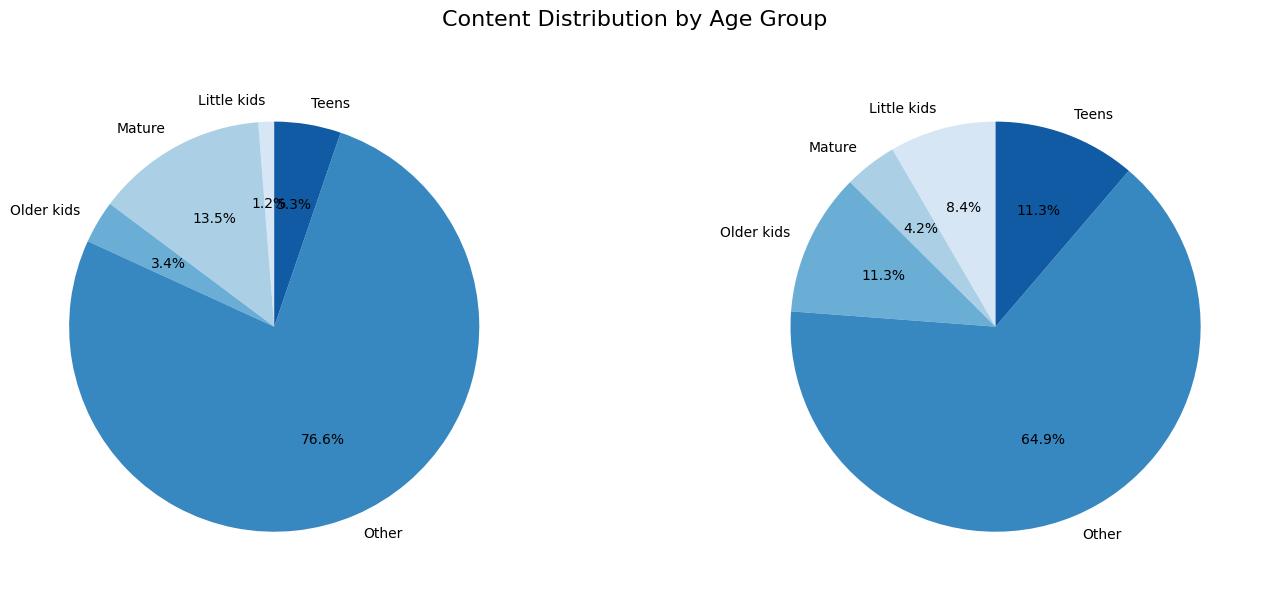

In [ ]:
# Visualisation de la distribution des contenus par groupes d'âge et types (films/séries)

# Liste des classifications par âge
little_kids = ['G', 'TV-Y', 'TV-G']
older_kids = ['PG', 'TV-Y7', 'TV-Y7-FV', 'TV-PG']
teens = ['PG-13', 'TV-14']
mature = ['R', 'NC-17', 'TV-MA']
rating_list = [little_kids, older_kids, teens, mature]
rating_names = ['Little kids', 'Older kids', 'Teens', 'Mature']

# Charger le dataset
amazone = pd.read_csv('/content/drive/MyDrive/amazon.csv')

# Filtrer les lignes avec des valeurs manquantes dans la colonne 'rating'
amazone_filtered = amazone[~amazone['rating'].isna()]

# Catégoriser les contenus en groupes d'âge
age_group = np.select([amazone_filtered['rating'].isin(categ) for categ in rating_list], rating_names, 'Other')

# Ajouter la colonne 'age_group' au DataFrame
amazone_filtered['age_group'] = age_group

# Regrouper les données par groupe d'âge et type (film/série)
amazone_grouped = amazone_filtered.groupby(['age_group', 'type']).size().unstack(fill_value=0)

# Créer un diagramme en camembert pour visualiser la distribution des contenus par groupe d'âge
fig, axes = plt.subplots(1, len(amazone_grouped.columns), figsize=(15, 6), subplot_kw={'aspect': 'equal'})
colors = sns.color_palette("Blues", n_colors=len(amazone_grouped))

for ax, (col, color) in zip(axes, zip(amazone_grouped.columns, colors)):
    amazone_grouped[col].plot.pie(ax=ax, autopct='%1.1f%%', startangle=90, colors=colors, legend=False)
    ax.set_ylabel('')
    ax.set_title(col, color='white')

# Ajuster le titre global
plt.suptitle('Content Distribution by Age Group', fontsize=16, color='black')

# Afficher le graphique
plt.tight_layout()
plt.show()


La question:Quelle est la distribution mensuelle des films et séries télévisées sur Amazon Prime Video ?
explication du code :Ce code analyse et visualise la distribution mensuelle des films et séries télévisées sur Amazon Prime Video. Il commence par charger le dataset et convertir la colonne de date en format datetime. Ensuite, il extrait l'année et le mois de chaque date ajoutée et les regroupe en une nouvelle colonne. Les données sont ensuite regroupées par mois et par type de contenu (film ou série télévisée), et le nombre de titres pour chaque groupe est calculé. Enfin, un graphique en lignes est tracé pour montrer le nombre de films et de séries télévisées par mois.

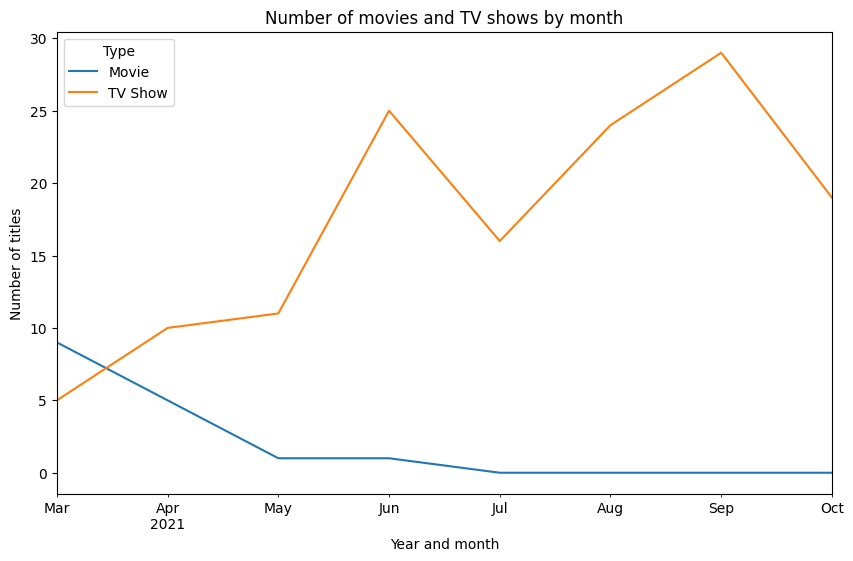

In [ ]:
# Charger le dataset
df = pd.read_csv('/content/drive/MyDrive/amazon.csv')

# Convertir la colonne de date en datetime
df['date_added'] = pd.to_datetime(df['date_added'])

# Extraire l'année et le mois de la date
df['year_month'] = df['date_added'].dt.to_period('M')

# Grouper par mois et type de contenu
title_counts = df.groupby(['year_month', 'type']).size().unstack(fill_value=0)

# Tracer un graphique en lignes
title_counts.plot(kind="line", stacked=False, figsize=(10, 6))

# Définir le titre, les labels et la légende
plt.title("Number of movies and TV shows by month")
plt.xlabel("Year and month")
plt.ylabel("Number of titles")
plt.legend(title="Type", labels=["Movie", "TV Show"])

# Afficher le graphique
plt.show()
